In [1]:
################################################ Package ##################################################
#Main Libs
import numpy as np
#Notebook Libs
import matplotlib.gridspec as gridspec
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
###########################################
import scipy
from scipy.special import erf
from scipy.optimize import curve_fit as cf
from random import random as r
###########################################
from matplotlib.ticker import ScalarFormatter
import matplotlib as mpl
from matplotlib import rcParams
from pylab import *
###########################################
#Internal Libs
print "######################################################"
print "Starting the code!! Good Luck!!"
print "Package Load"
import fitting
from fitting import LOGCEN 
from fitting import LOGSAT

######################################################
Starting the code!! Good Luck!!
Package Load


In [2]:
filename = 'HOD_SN46_0p0316_Stell_Age'
data = np.load('Data_bin/' + filename + '.npy' )
X_axis = np.load('Data_bin/X_axis.npy')

params = np.zeros((11, 6, 2), dtype = np.float32)

for i in range(11):
    
    Data = data[i]
    Log_Cen = np.log10(Data[1])
    Log_Sat = np.log10(Data[2])
    
    par_cen, par_sat = fitting.Adjust(X_axis, Log_Cen, Log_Sat)
    m1_mmin_ratio =  10**par_sat[1][0] / 10**par_cen[0][0]
    m1_mmin_ratio_err = par_sat[1][1] / par_cen[0][1]
    m1_mmin = np.array([[m1_mmin_ratio, m1_mmin_ratio_err]])
    
    params[i] = np.concatenate((par_cen, par_sat, m1_mmin), axis = 0)

/home/esteban/.local/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: divide by zero encountered in log10
/home/esteban/.local/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in log10
fitting.py:19: RuntimeWarning: divide by zero encountered in log10
  return np.log10(0.5 * (1 + erf))


In [5]:
NBINS = 10
bins = np.array([k/10. for k in range(NBINS)]) + 0.05
hline = np.linspace(0,1,100)

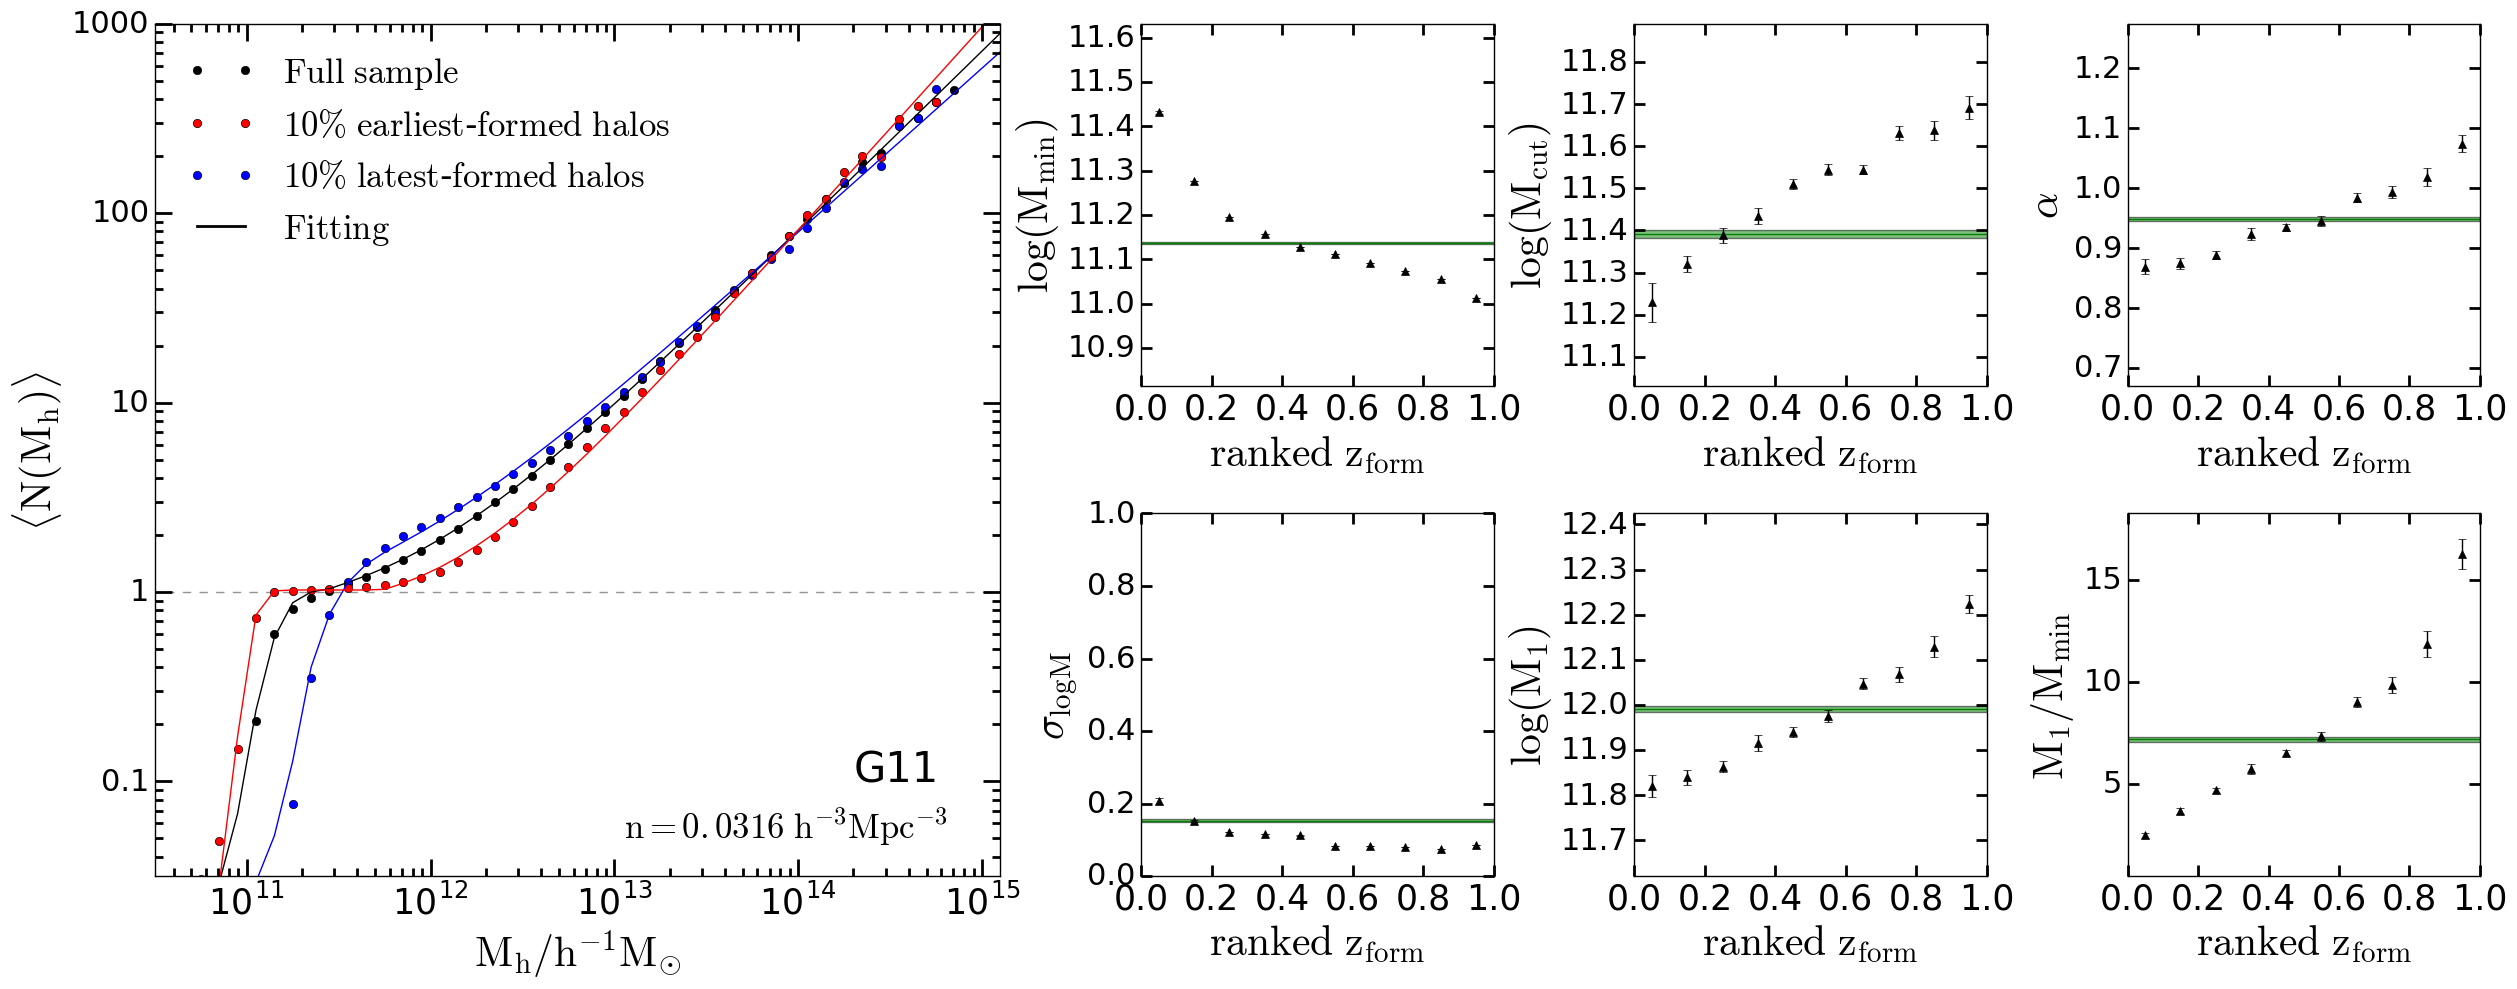

In [6]:
def Ratio_Plot():
    mpl.rcParams['xtick.labelsize'] = 25 #X-numbers size
    mpl.rcParams['ytick.labelsize'] = 22 #Y-numbers size
    ax,fig = plt.subplots(nrows=1, ncols=1, figsize=(30, 11))
    ####################################################################################################
    gs = gridspec.GridSpec(2, 5)
    
    ax2 = plt.subplot(gs[0,2])
    ax3 = plt.subplot(gs[1,2])
    ax4 = plt.subplot(gs[0,3])
    ax5 = plt.subplot(gs[1,3])
    ax6 = plt.subplot(gs[0,4])
    ax7 = plt.subplot(gs[1,4])
    ax1 = plt.subplot(gs[:, :2])#Range of Y, Range of X, left top corner is 0,0
    
    gs.update(wspace=0.4,hspace=0.35)

    dx = [10**9,10**16]
    dy = [10**0,10**0]
    ax1.plot(dx,dy, linewidth=1,ls='--',color = '#939393')
    
    ax1.plot(10**X_axis, data[0][0], 'ko')
    ax1.plot(10**X_axis, data[1][0], 'bo')
    ax1.plot(10**X_axis, data[10][0], 'ro')
    
    #ax1.plot(10**X_axis, data[0][1] + data[0][2], 'k-')
    #ax1.plot(10**X_axis, data[1][1] + data[1][2], 'b-')
    #ax1.plot(10**X_axis, data[10][1] + data[10][2], 'r-')
    plt.plot(10**X_axis, 10**LOGCEN(X_axis, *params[0,:2,0]) + 10**LOGSAT(X_axis, *params[0,2:5,0]), 'k-')
    plt.plot(10**X_axis, 10**LOGCEN(X_axis, *params[1,:2,0]) + 10**LOGSAT(X_axis, *params[1,2:5,0]), 'b-')
    plt.plot(10**X_axis, 10**LOGCEN(X_axis, *params[10,:2,0]) + 10**LOGSAT(X_axis, *params[10,2:5,0]), 'r-')
    
    ax1.plot([], [], 'ko', linewidth=2, label=r'$\rm Full\ sample$')
    ax1.plot([], [], 'ro', linewidth=2, label=r'$\rm 10\%\ earliest$-'+r'$\rm formed\ halos$')
    ax1.plot([], [], 'bo', linewidth=2, label=r'$\rm 10\%\ latest$-'+r'$\rm formed\ halos$')
    ax1.plot([], [], 'k-', linewidth=2, label=r'$\rm Fitting$')

    
    ax1.legend(loc='upper left', shadow=True,fontsize=25,frameon=False)
    ax1.set_yscale("log")
    ax1.set_xscale("log")
    ax1.set_yticks([0.1,1,10,100,1000])
    locs, labels = yticks()
    yticks(locs, ['0.1','1','10','100','1000'])
    ax1.text(2e14, 0.1, 'G11', fontsize=30)
    ax1.set_xlim([10**10.5,10**15.1])
    ax1.set_ylim([10**-1.5,10**3]) 
    ax1.text(10**13.05, 0.05, r'$\rm n= 0.0316 \ h^{-3}Mpc^{-3}$', fontsize=25)
    #13.05 for ND -2
    ####################################################################################################    
    
    ####################################################################################################
    
    ax2.fill_between(hline,params[0][0][0] -params[0][0][1],params[0][0][0] +
                     params[0][0][1], facecolor='green', alpha=0.5)
    ax2.plot(hline, np.ones(len(hline))*params[0][0][0], 'g-', linewidth=1)
    ax2.errorbar(bins, params[1:,0,0], yerr=params[1:,0,1], fmt='k^')
    
    ax2.set_xlim([0,1])
    #ax2.set_ylim([0,1])
    ax2.set_ylim([min(params[1:,0,0])-.2,max(params[1:,0,0])+.2]) 
    ####################################################################################################    
    
    ####################################################################################################

    ax3.fill_between(hline, params[0][1][0]-params[0][1][1],params[0][1][0] +
                     params[0][1][1], facecolor='green', alpha=0.5)
    ax3.plot(hline, np.ones(len(hline))*params[0][1][0],'g-', linewidth=1)
    ax3.errorbar(bins, params[1:,1,0], yerr=params[1:,1,1], fmt='k^')
    
    ax3.set_xlim([0,1])
    ax3.set_ylim([0,1]) 
    ####################################################################################################    
    
    ####################################################################################################

    ax4.fill_between(hline, params[0][2][0]-params[0][2][1],params[0][2][0] +
                     params[0][2][1], facecolor='green', alpha=0.5)
    ax4.plot(hline, np.ones(len(hline))*params[0][2][0], 'g-', linewidth=1)
    ax4.errorbar(bins, params[1:,2,0], yerr=params[1:,2,1], fmt='k^')
    
    ax4.set_xlim([0,1])
    ax4.set_ylim([min(params[1:,2,0])-.2,max(params[1:,2,0])+.2]) 
    ####################################################################################################    
    #                                  LOG(M1)
    ####################################################################################################

    ax5.fill_between(hline, params[0][3][0]-params[0][3][1],params[0][3][0] +
                     params[0][3][1], facecolor='green', alpha=0.5)
    ax5.plot(hline, np.ones(len(hline))*params[0][3][0], 'g-', linewidth=1)
    ax5.errorbar(bins, params[1:,3,0], yerr=params[1:,3,1], fmt='k^')
    
    ax5.set_xlim([0,1])
    ax5.set_ylim([min(params[1:,3,0])-.2,max(params[1:,3,0])+.2]) 
    ####################################################################################################    
    
    ####################################################################################################

    ax6.fill_between(hline, params[0][4][0]-params[0][4][1],params[0][4][0] +
                     params[0][4][1], facecolor='green', alpha=0.5)
    ax6.plot(hline, np.ones(len(hline))*params[0][4][0], 'g-', linewidth=1)
    ax6.errorbar(bins, params[1:,4,0], yerr=params[1:,4,1], fmt='k^')
    
    ax6.set_xlim([0,1])
    ax6.set_ylim([min(params[1:,4,0])-.2,max(params[1:,4,0])+.2]) 
    ####################################################################################################    
    
    ####################################################################################################
    
    Err1 = 10**(params[0][3][0] - params[0][0][0]) * np.log(10) * (params[0][3][1]**2 + params[0][0][1]**2)**0.5
    ax7.fill_between(hline, 10**(params[0][3][0] - params[0][0][0])-Err1, 10**(params[0][3][0] - params[0][0][0])
                     +Err1, facecolor='green', alpha=0.5)
    ax7.plot(hline, np.ones(len(hline))* 10**(params[0][3][0] - params[0][0][0]),'g-', linewidth=1)
    Rat = 10**(params[1:,3,0]- params[1:,0,0])
    Err2 = Rat * np.log(10) * (params[1:,3,1]**2 + params[1:,0,1]**2)**0.5
    ax7.errorbar(bins, Rat, yerr=Err2, fmt='k^')
    
    ax7.set_xlim([0,1])
    ax7.set_ylim([min(Rat)-2, max(Rat)+2]) 
    
    ####################################################################################################    
    ax1.tick_params('both', length=12, width=2, which='major')
    ax1.tick_params('both', length=6, width=2, which='minor')
    ax2.tick_params('both', length=8, width=2, which='major')
    ax2.tick_params('both', length=4, width=2, which='minor')
    ax3.tick_params('both', length=8, width=2, which='major')
    ax3.tick_params('both', length=4, width=2, which='minor')
    ax4.tick_params('both', length=8, width=2, which='major')
    ax4.tick_params('both', length=4, width=2, which='minor')
    ax5.tick_params('both', length=8, width=2, which='major')
    ax5.tick_params('both', length=4, width=2, which='minor')
    ax6.tick_params('both', length=8, width=2, which='major')
    ax6.tick_params('both', length=4, width=2, which='minor')
    ax7.tick_params('both', length=8, width=2, which='major')
    ax7.tick_params('both', length=4, width=2, which='minor')
    ####################################################################################################
    xname = r'$\rm ranked\ z_{form}$'
    yname = r'$\rm z_{form}$'
    
    ax1.set_xlabel(r'$\rm M_{h}/h^{-1}M_{\odot}$', fontsize=30)
    ax1.set_ylabel(r'$\rm \langle N(M_{h})\rangle$', fontsize=30)
    
    ax2.set_xlabel(xname, fontsize=30)
    ax2.set_ylabel(r'$\rm log(M_{min})$', fontsize=30)

    ax3.set_xlabel(xname, fontsize=30)
    ax3.set_ylabel(r'$\rm \sigma_{logM}$', fontsize=30)

    ax4.set_xlabel(xname, fontsize=30)
    ax4.set_ylabel(r'$\rm log(M_{cut})$', fontsize=30)

    ax5.set_xlabel(xname, fontsize=30)
    ax5.set_ylabel(r'$\rm log(M_1)$', fontsize=30)

    ax6.set_xlabel(xname, fontsize=30)
    ax6.set_ylabel(r'$\rm \alpha$', fontsize=30)

    ax7.set_xlabel(xname, fontsize=30)
    ax7.set_ylabel(r'$\rm M_1/M_{min}$', fontsize=30)
    ####################################################################################################
    
    plt.savefig('%s.jpeg' %filename,rasterized=True, bbox_inches='tight')
    show()
    #########################################################
Ratio_Plot()

In [ ]:
params[0][0][0]